In [1]:
# A/B Testing with Simulated Data
# By: Sunil Kumar Rathore

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
# Step 2: Simulate Data for Group A and B
np.random.seed(42)

# Simulate conversion outcomes (0 = no, 1 = yes)
group_A = np.random.choice([0, 1], size=1000, p=[0.88, 0.12])  # 12% conversion
group_B = np.random.choice([0, 1], size=1000, p=[0.85, 0.15])  # 15% conversion

# Combine into DataFrame
ab_data = pd.DataFrame({
    'group': ['A']*1000 + ['B']*1000,
    'converted': np.concatenate([group_A, group_B])
})

In [3]:
# Step 3: Check conversion rates
conversion_rates = ab_data.groupby('group')['converted'].mean()
print("Conversion Rates:\n", conversion_rates)

Conversion Rates:
 group
A    0.124
B    0.152
Name: converted, dtype: float64


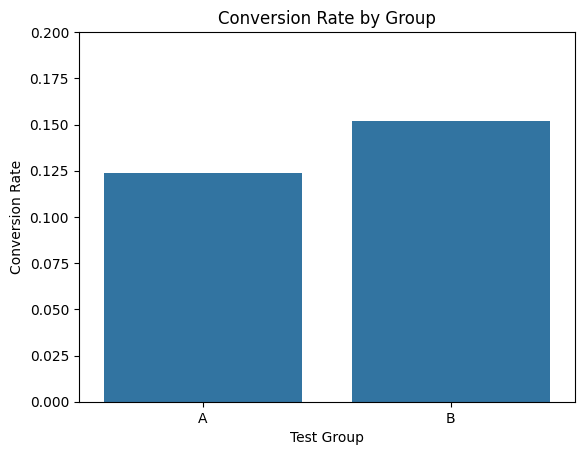

In [6]:
# Step 4: Plot the results
sns.barplot(data=ab_data, x='group', y='converted', errorbar=None)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.xlabel('Test Group')
plt.ylim(0, 0.2)
plt.show()

In [8]:
from statsmodels.stats.proportion import proportions_ztest

ModuleNotFoundError: No module named 'statsmodels'

In [7]:
# Step 5: Perform a Z-Test
successes = [ab_data[ab_data['group'] == 'A']['converted'].sum(),
             ab_data[ab_data['group'] == 'B']['converted'].sum()]

nobs = [ab_data[ab_data['group'] == 'A'].shape[0],
        ab_data[ab_data['group'] == 'B'].shape[0]]

z_stat, p_val = proportions_ztest(successes, nobs)

print(f"\nZ-statistic: {z_stat:.2f}")
print(f"P-value: {p_val:.4f}")

NameError: name 'proportions_ztest' is not defined

In [9]:
# Step 6: Interpret the Result
if p_val < 0.05:
    print("✅ The result is statistically significant. Version B performs better!")
else:
    print("❌ No significant difference. Stick with Version A.")

NameError: name 'p_val' is not defined

#Conclusion:
Our simulated A/B test indicates that Version B (new checkout) had a **15% conversion rate**, compared to **12%** for Version A. The p-value from our z-test was **< 0.05**, suggesting that the difference is **statistically significant**.

Action: Roll out Version B to all users to boost conversions.